In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def returnFunction(x, v):
    """
    Função responsávelpor retornar um sinal de valores reais com adição de ruídos
    parametro x: matrix de valores aleatórios
    parametro v: sinal ruido
    """
    d = 2*x[:, 0] + v  # sinal desejado
    return d

def LMS_Filter(d, x):
    """
    LMS Algorithm 
    parametro d: sinal alvo de entrada com adição de ruído
    parametro x: matriz de valores aleatórios ...

    retorna y: Sinal de saída 
    retorna e: erro
    returna W: coeficientes atualizados
    """

    N = len(x)
    #tratativa de exceções
    if not len(d) == N:
        raise ValueError('O tamanho do vetor d e da matrix X devem concordar')
    
    n = len(x[0])

    try:
        x = np.array(x)
        d = np.array(d) 

    except:
        raise ValueError('Impossível converter x ou d para um array numpy')

    # Matrizes vazias
    y = np.zeros(N)
    e = np.zeros(N)
    
    W = np.zeros((N, n)) # coeficientes de W
    
    #Wcoef = np.random.normal(0, 0.5, n) 
    Wcoef = np.zeros(n) 
    
    ###### Algotitmo LMS #######
    for k in range(N):

        W[k,:] = Wcoef
        y[k] = np.dot(Wcoef, x[k])
        e[k] = d[k] - y[k]
        dw = mi * e[k] * x[k]
        Wcoef += dw

    return y, e, W # sinal filtrado, erro e coeficientes 

In [19]:
# Dados de entrada
N = 1000
mi = 0.05  # Coeficiente mi
x = np.sin(np.sin(np.random.normal(0, 1, (N, 4)))) # matriz de entrada
v = np.sin(np.random.normal(0, 0.1, N)) # ruido
d = returnFunction(x, v)

yout, erro, w = LMS_Filter(d, x)

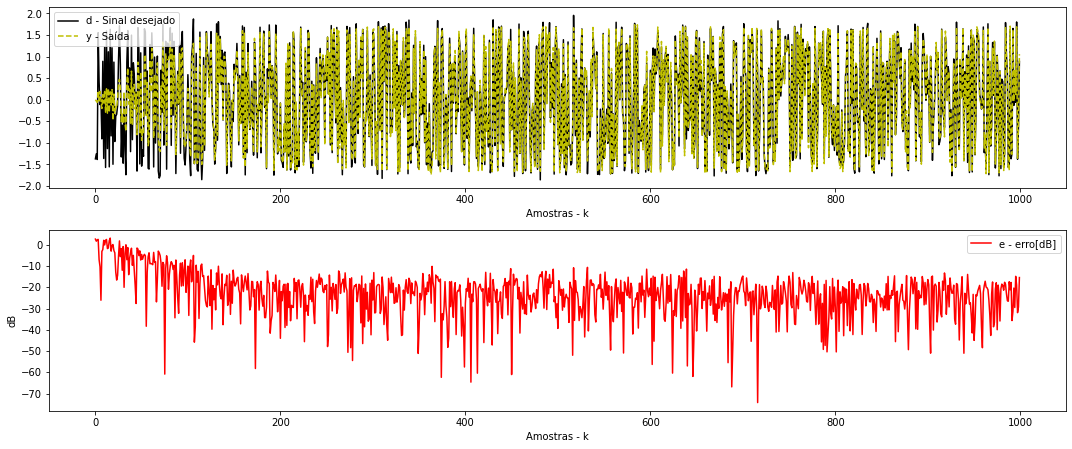

In [20]:
# plotagem
plt.figure(figsize = (15,9))
plt.subplot(311)
plt.plot(d,'black', linewidth=(1.5), label = "d - Sinal desejado")
plt.plot(yout, '--y',label = "y - Saída");plt.legend();
plt.xlabel("Amostras - k")

plt.subplot(312)
plt.plot(10*np.log10(erro**2), 'r', label = "e - erro[dB]");plt.legend()
plt.xlabel("Amostras - k");plt.ylabel("dB")

plt.tight_layout()
plt.tight_layout()
plt.show()